In [26]:
import pandas as pd
import seaborn as sns
sns.set()

raw_data = pd.read_csv('datasets/e1 positive.csv') 
feature_num = raw_data.shape[1]-1
instance_num = raw_data.shape[0]
print(feature_num)
print(instance_num)
raw_data.describe(include='all')

608
871


,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,317.195147,160.794717,188.372969,263.524808,79.262833,137.275239,229.995772,52.507171,59.435549,41.151089,...,10.664136,2.557719,31.528201,14.410798,11.514892,7.873938,24.349328,4.727715,4.940665,0.343284
std,378.241239,189.064895,208.232294,999.259112,127.012517,264.213953,245.183809,232.926742,291.806179,80.825275,...,99.005377,29.264949,221.308620,91.880695,81.364902,79.936480,113.287913,37.848376,32.248300,0.475078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.894340,32.084673,35.094833,0.000000,4.019327,14.288171,33.733073,0.000000,0.000000,1.001922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,218.427681,108.811797,130.794368,0.000000,29.073964,73.962624,181.287669,0.000000,0.000000,5.080387,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,440.087971,218.480061,265.911406,6.031598,100.142130,169.816497,334.398305,0.000000,1.005632,47.306796,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.014025,0.000000,0.000000,1.000000
max,3435.333490,2011.629811,1704.202638,10950.762140,1293.563390,6061.307927,2058.199518,2331.740949,4900.202343,839.058368,...,2086.435931,685.510866,3557.887531,1486.017423,1660.938508,1949.849508,2147.133231,513.075890,530.991217,1.000000


In [27]:
from sklearn.model_selection import train_test_split
y = raw_data['Label']
x = raw_data.drop('Label', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=98)

OOB Score:  0.993431855500821
Cross-validation scores:  [0.98969072 1.         0.98965517]
Mean cross-validation score:  0.9931152980210926


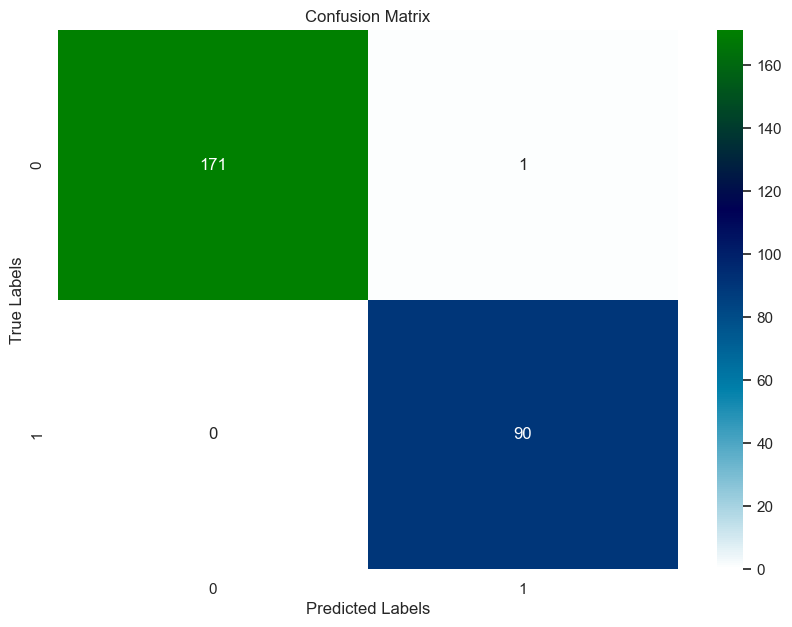

[[171   1]
 [  0  90]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=98)
model.fit(x_train, y_train)
print('OOB Score: ', model.oob_score_)

cv_scores = cross_val_score(model, x, y, cv=3)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='ocean_r')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()
print(conf_matrix)


/var/folders/4g/x2wdjt8j0dl5pbbvy9t5cl980000gn/T/ipykernel_95340/1709749096.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


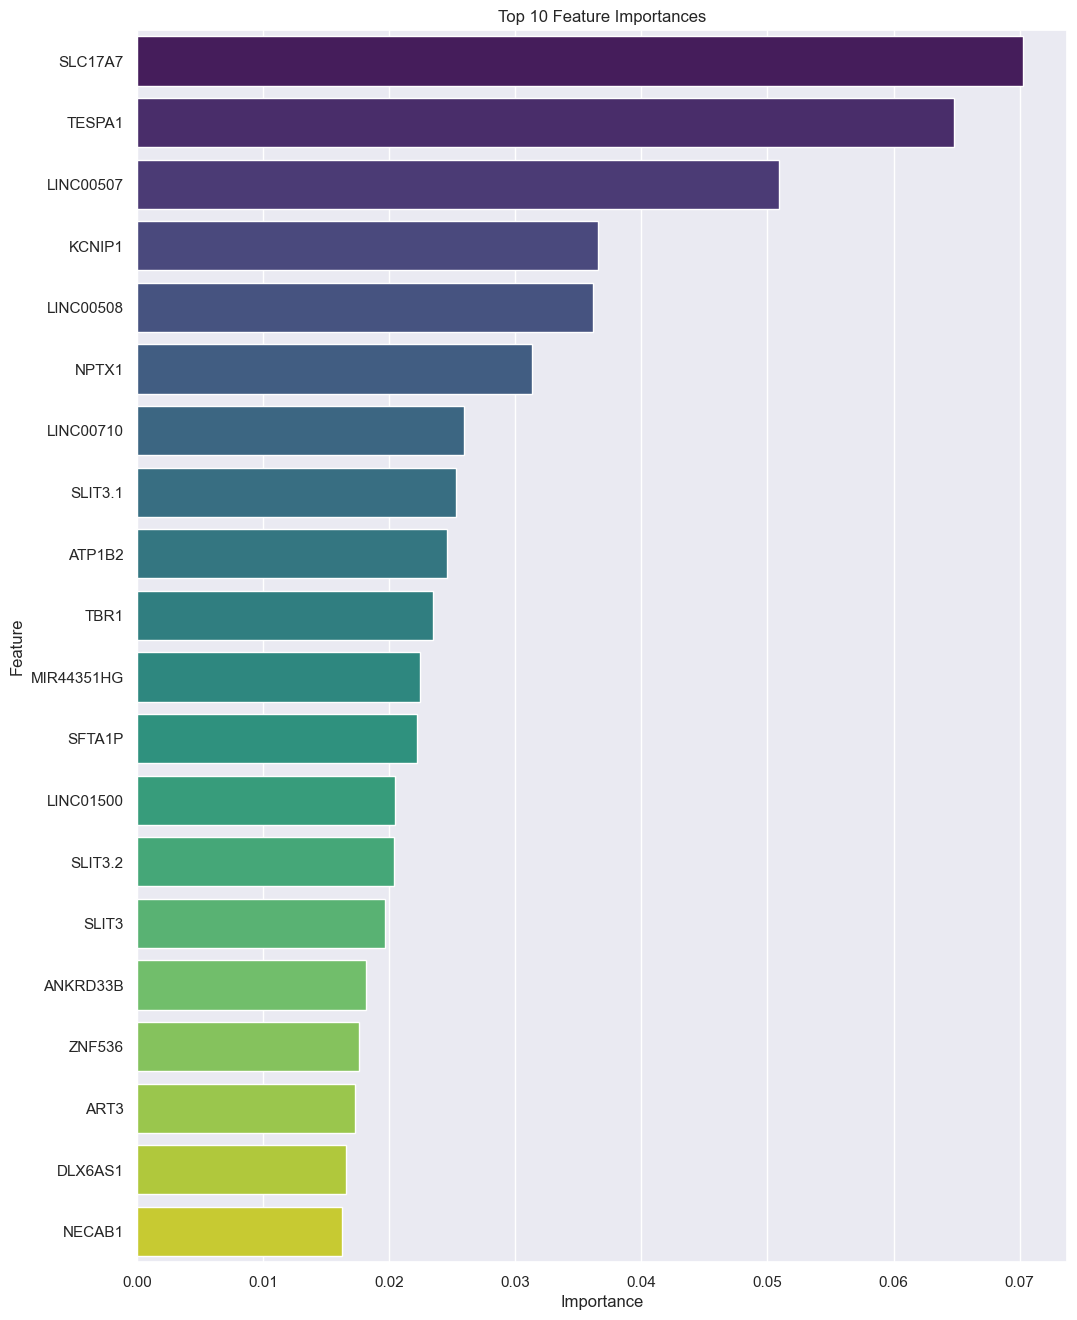

In [38]:
import numpy as np
# Plot feature importances
feature_importances = model.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(20)

# Visualize the top 10 feature importances
plt.figure(figsize=(12, 16))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()